## TITLE : BIG MART SALES DATA ANALYSIS

### Libraries :

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Importing and understanding data :

In [37]:
data = pd.read_csv("C://Users//KARTHIK//OneDrive//Desktop//INFOSYS//Final_Project//Train-Set.csv")

In [38]:
data.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.shape

(8523, 12)

In [6]:
for columns in data.columns:
    print(columns)

ProductID
Weight
FatContent
ProductVisibility
ProductType
MRP
OutletID
EstablishmentYear
OutletSize
LocationType
OutletType
OutletSales


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Cleaning :

In [9]:
data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [10]:
data['Weight'] = data.groupby('ProductType')['Weight'].transform(lambda x: x.fillna(x.mean()))

In [11]:
data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [12]:
# Mode Imputation or Group-Based Imputation for OutletSize
# Fill OutletSize with the most common size within each OutletType and LocationType combination
data['OutletSize'] = data.groupby(['OutletType', 'LocationType'])['OutletSize'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

# If any missing values remain in OutletSize, fill them with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data['OutletSize'] = imputer.fit_transform(data[['OutletSize']])

In [13]:
data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

Missing values are handled using the appropriate methods.

In [35]:
data.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Cluster
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,2
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,0


### EDA :

#### (i) Heatmap -> Producttype count by Establishment Year

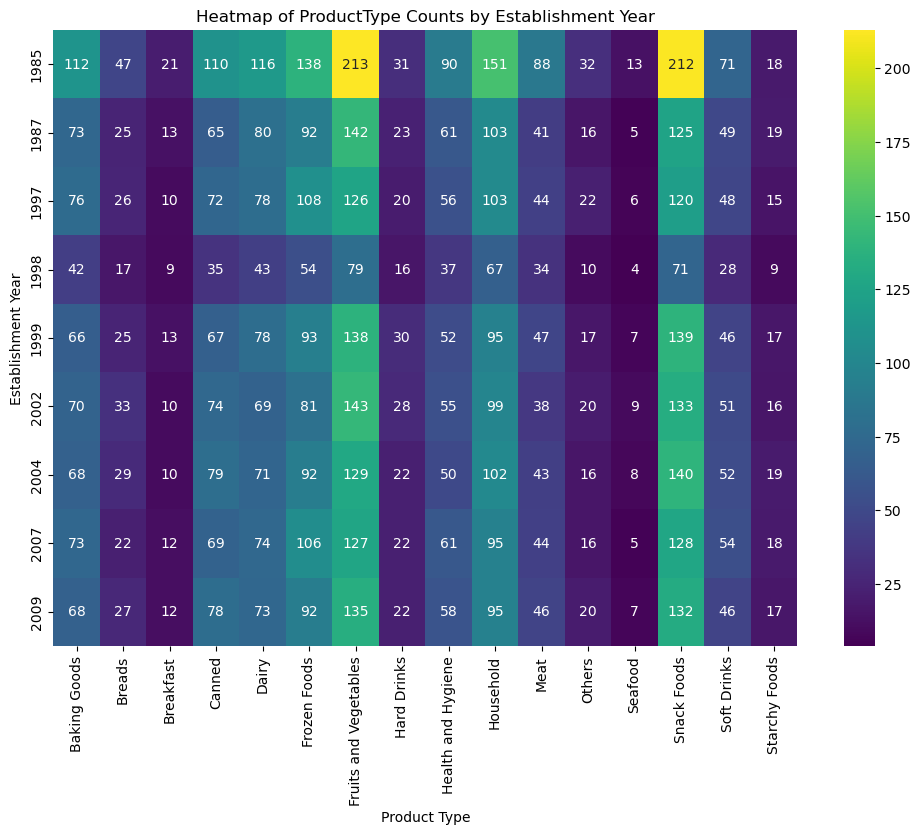

In [15]:
# Creating a pivot table for the heatmap
product_year_counts = data.pivot_table(index='EstablishmentYear', columns='ProductType', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_year_counts, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.title('Heatmap of ProductType Counts by Establishment Year')
plt.xlabel('Product Type')
plt.ylabel('Establishment Year')
plt.show()

#### (ii) Bar chart -> Total Outlet Sales by OutletType

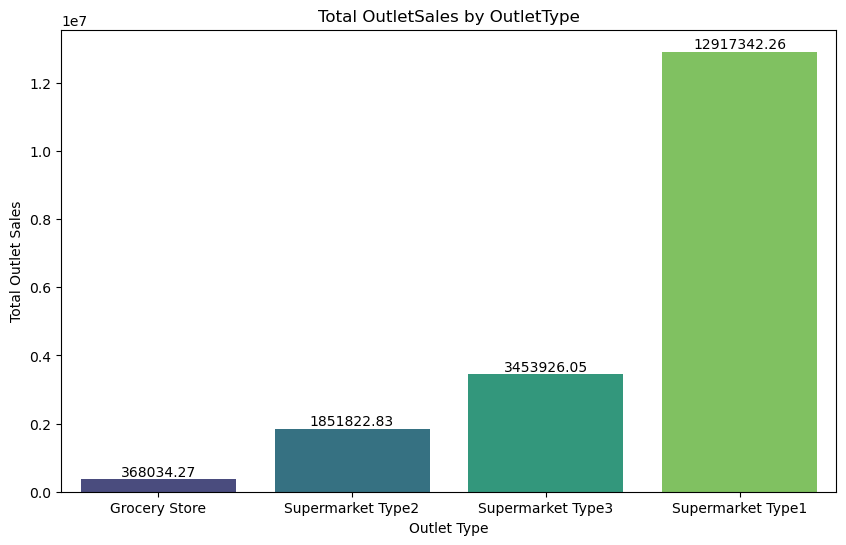

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the total OutletSales for each OutletType
total_sales_by_outlet_type = data.groupby('OutletType')['OutletSales'].sum().sort_values()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=total_sales_by_outlet_type.index, y=total_sales_by_outlet_type.values, palette="viridis")
plt.title('Total OutletSales by OutletType')
plt.xlabel('Outlet Type')
plt.ylabel('Total Outlet Sales')

# Adding value labels on top of each bar
for index, value in enumerate(total_sales_by_outlet_type.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

#### (iii) Box plot -> Distribution of MRP by ProductType 

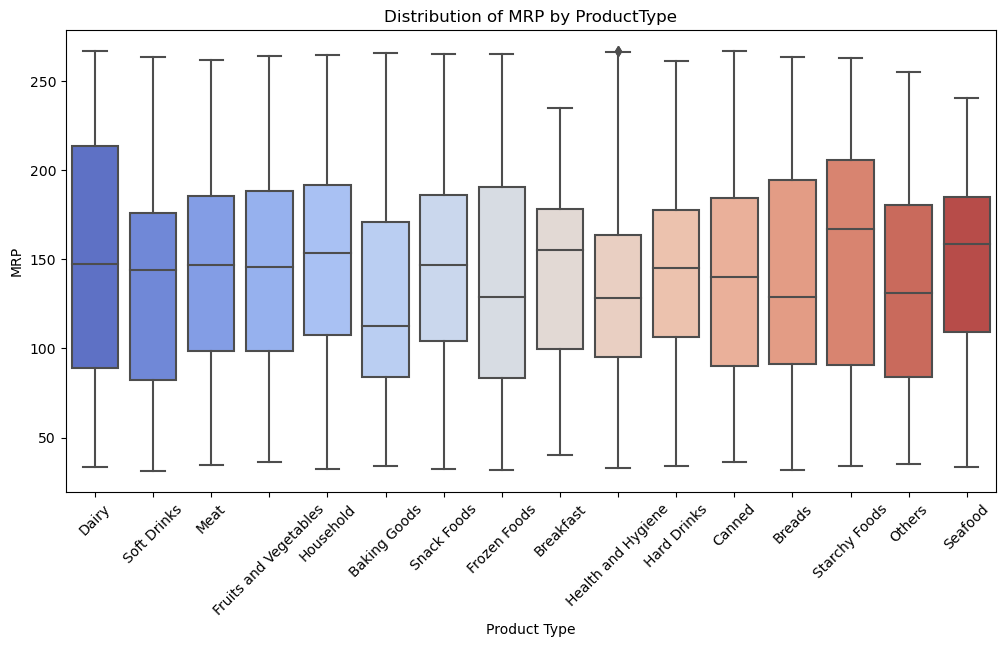

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='ProductType', y='MRP', palette="coolwarm")
plt.title('Distribution of MRP by ProductType')
plt.xlabel('Product Type')
plt.ylabel('MRP')
plt.xticks(rotation=45)
plt.show()


#### (iv) Scatter -> Relationship Between ProductVisibility and OutletSales

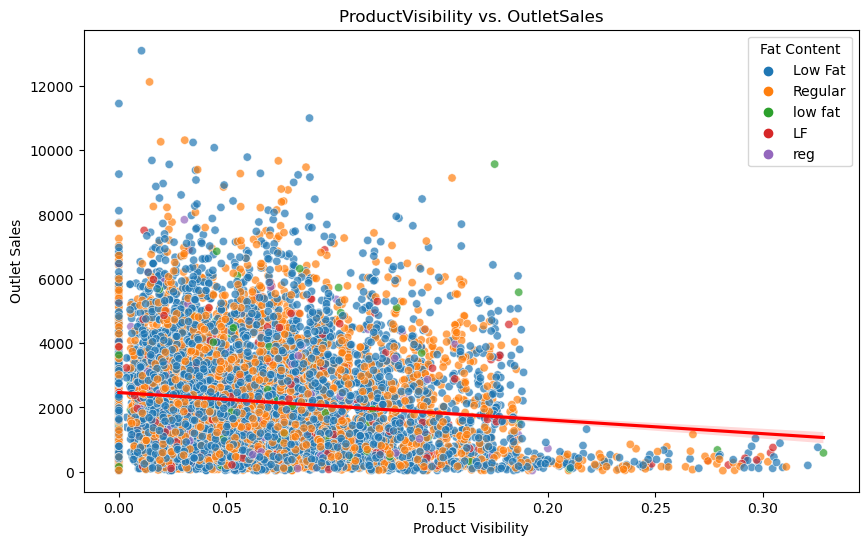

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ProductVisibility', y='OutletSales', hue='FatContent', alpha=0.7)
sns.regplot(data=data, x='ProductVisibility', y='OutletSales', scatter=False, color="red")
plt.title('ProductVisibility vs. OutletSales')
plt.xlabel('Product Visibility')
plt.ylabel('Outlet Sales')
plt.legend(title='Fat Content')
plt.show()

#### (v) Stacked Bar chart -> Outlet Sales by Location Type and Outlet Size

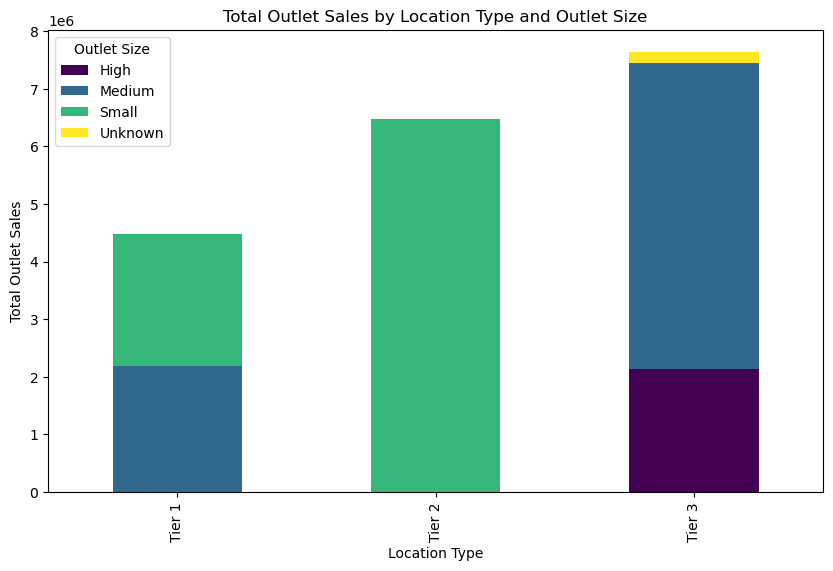

In [19]:
sales_by_location_size = data.groupby(['LocationType', 'OutletSize'])['OutletSales'].sum().unstack()

sales_by_location_size.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Total Outlet Sales by Location Type and Outlet Size')
plt.xlabel('Location Type')
plt.ylabel('Total Outlet Sales')
plt.legend(title='Outlet Size')
plt.show()

#### (vi) Pie chart -> Distribution of outletsales by OutletType

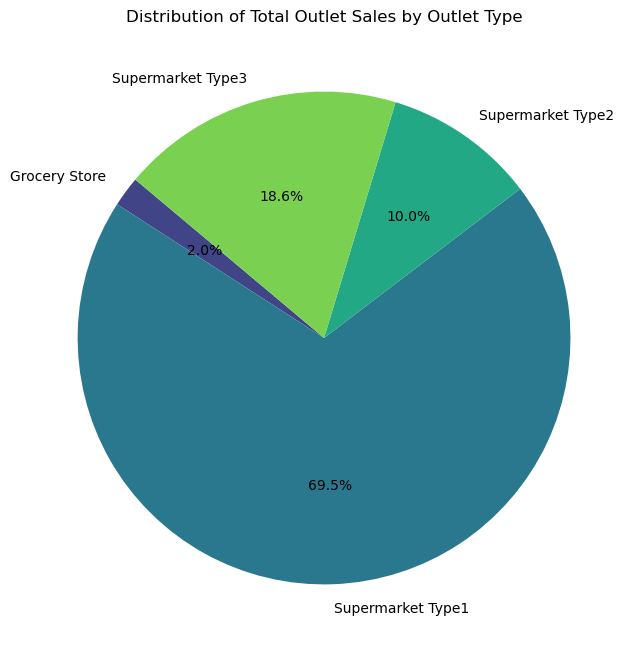

In [20]:
# Calculating total OutletSales by OutletType
sales_by_outlet_type = data.groupby('OutletType')['OutletSales'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_outlet_type, labels=sales_by_outlet_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sales_by_outlet_type)))
plt.title('Distribution of Total Outlet Sales by Outlet Type')
plt.show()

#### (vii) Regression plot -> MRP and OutletSales

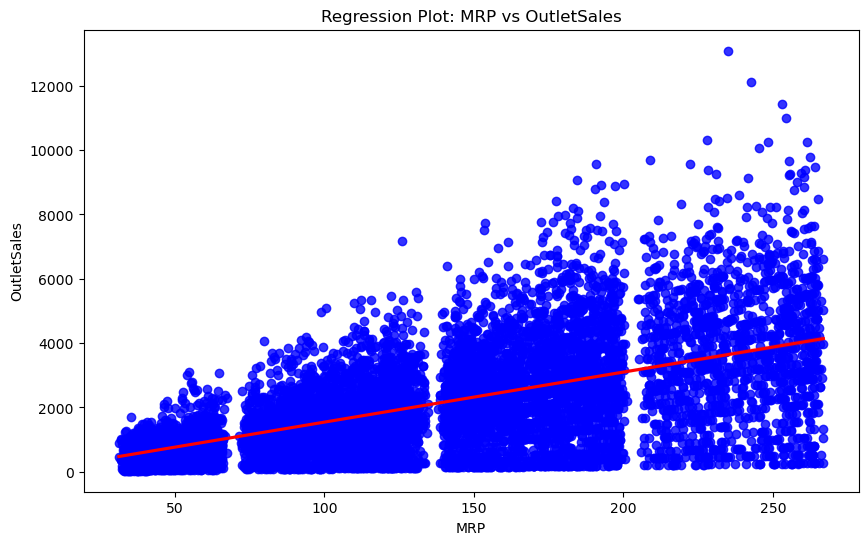

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MRP', y='OutletSales', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot: MRP vs OutletSales')
plt.xlabel('MRP')
plt.ylabel('OutletSales')
plt.show()

#### (viii) Heatmap

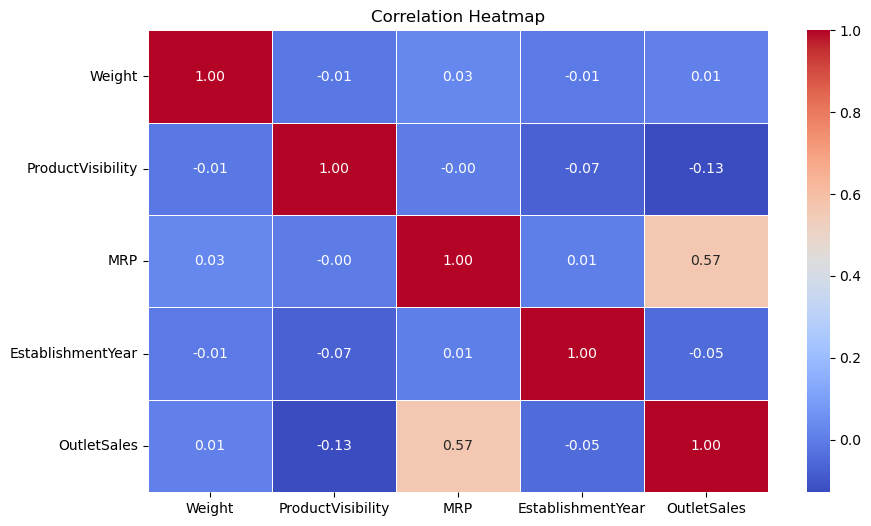

In [22]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### (ix)  pair plot

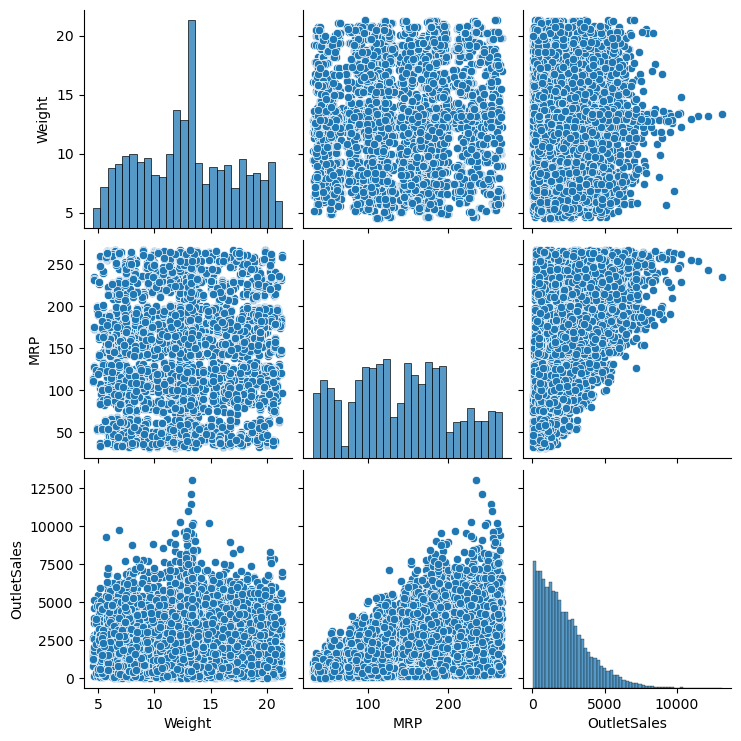

In [23]:
numerical_columns = ['Weight', 'FatContent', 'MRP', 'OutletSales']

# Create a pair plot
sns.pairplot(data[numerical_columns])
plt.show()

#### (x) Kde Plot

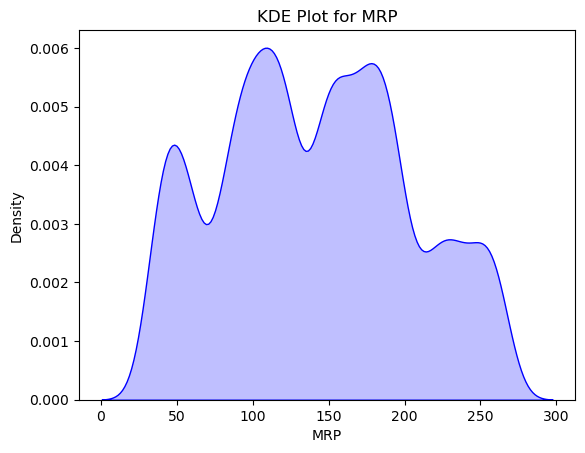

In [24]:
sns.kdeplot(data['MRP'], shade=True, color="blue")
plt.title('KDE Plot for MRP')
plt.xlabel('MRP')
plt.ylabel('Density')
plt.show()

### Ordinary Least Square

In [25]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data[['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSize', 'LocationType', 'OutletType']]
y = data['OutletSales']

In [26]:
X = pd.get_dummies(X, drop_first=True)  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [27]:
equation = "y = {:.2f}".format(model.params[0])
for i in range(1, len(model.params)):
    equation += " + {:.2f}*{}".format(model.params[i], X.columns[i])

print("\nFitted Line Equation:")
print(equation)


Fitted Line Equation:
y = -52833.03 + -0.53*Weight + -265.23*ProductVisibility + 15.57*MRP + 30.72*EstablishmentYear + -9911.63*OutletSize_Medium + -9948.22*OutletSize_Small + -755.73*OutletSize_Unknown + -165.09*LocationType_Tier 2 + -9610.09*LocationType_Tier 3 + 1520.79*OutletType_Supermarket Type1 + 10449.34*OutletType_Supermarket Type2 + 12913.75*OutletType_Supermarket Type3


In [28]:
predictions = model.predict(X)

mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 836.45
Mean Squared Error (MSE): 1273156.51
R-squared: 0.56


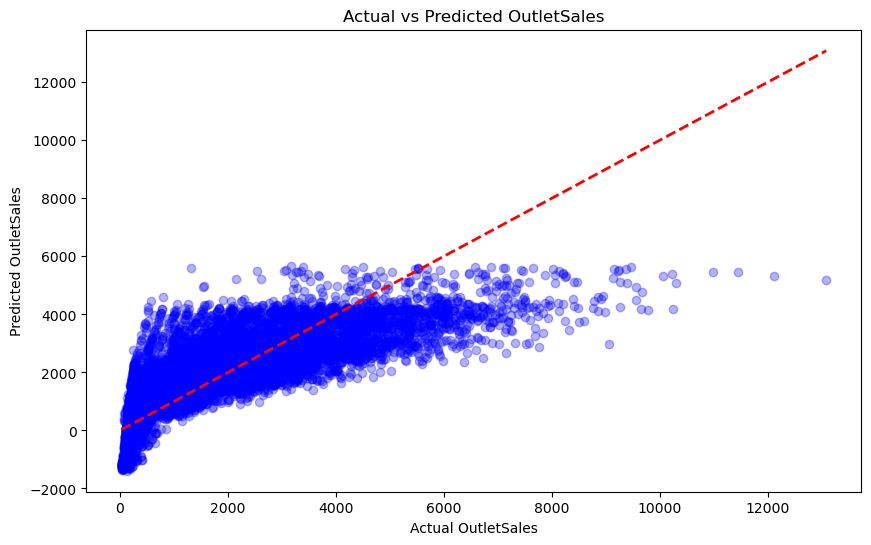

                            OLS Regression Results                            
Dep. Variable:            OutletSales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     995.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:22:47   Log-Likelihood:                -71998.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Reference line
plt.xlabel("Actual OutletSales")
plt.ylabel("Predicted OutletSales")
plt.title("Actual vs Predicted OutletSales")
plt.show()

print(model.summary())

### KMeans

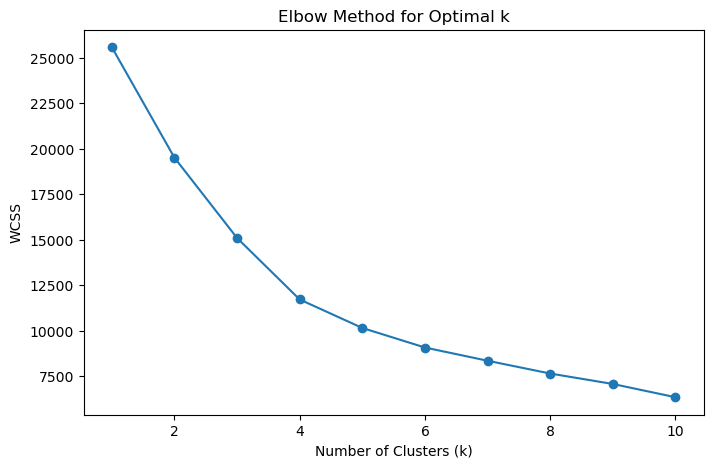

In [32]:
features = ['Weight', 'ProductVisibility', 'MRP']
data_clustering = data[features]

data_clustering = data_clustering.fillna(data_clustering.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clustering)

# Step 4: Determine Optimal k (Elbow Method)
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

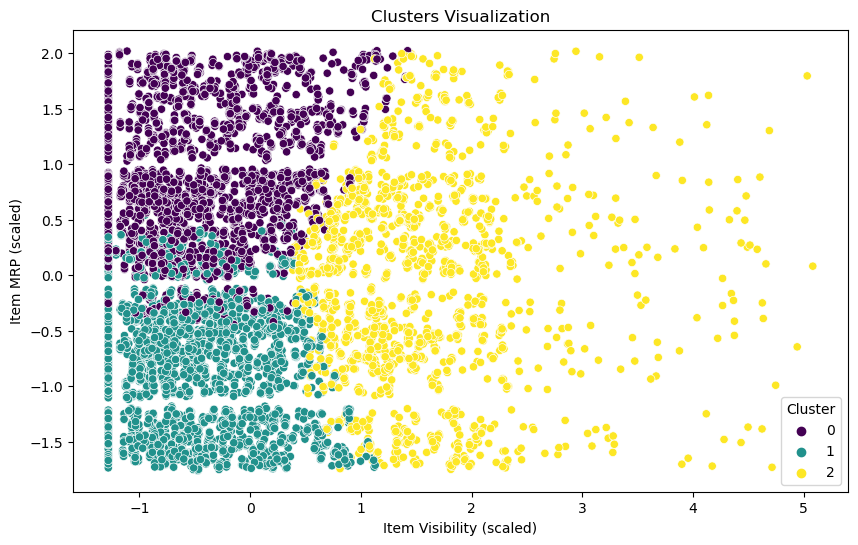

In [33]:
optimal_k = 3  # Assume 3 clusters from Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_data[:, 1], y=scaled_data[:, 2], 
    hue=data['Cluster'], palette='viridis'
)
plt.title("Clusters Visualization")
plt.xlabel("Item Visibility (scaled)")
plt.ylabel("Item MRP (scaled)")
plt.show()

In [34]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:\n", cluster_df)

Cluster Centers:
       Weight  ProductVisibility         MRP
0  13.880908           0.045785  195.263207
1  11.823541           0.043246   89.819905
2  12.888935           0.142790  136.120049
